# ДЗ по "Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn"
##  Видеоурок 6. Обучение с учителем в Scikit-learn.
* Домашнее задание:  
[Практическое задание](https://gbcdn.mrgcdn.ru/uploads/asset/5788496/attachment/d8fe09d4348597c3d8cf86f8d459dc5d.pdf).

## Тема “Обучение с учителем””

In [7]:
# Устанавливаем пакеты есои они не установлены
# !pip install pandas
# !pip install matplotlib
# !pip install numpy
# !pip install scikit-learn

### Задание 1
- Импортируйте библиотеки `pandas` и `numpy`.
- Загрузите `Boston House Prices dataset` из встроенных наборов данных библиотеки `sklearn`.
- Разбейте эти датафреймы на тренировочные (`X_train`, `y_train`) и тестовые (`X_test`, `y_test`) с помощью функции `train_test_split` так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент `random state` должен быть равен 42.
- Создайте модель линейной регрессии под названием `lr` с помощью класса `LinearRegression` из модуля `sklearn.linear_model`.
- Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

In [8]:
# Загружаем необходимые библиотеки
import numpy as np
import pandas as pd

# Уберем warnings
import warnings
warnings.filterwarnings('ignore')

В новых версиях `scikit-learn` нет датасета `boston`, но хочется воспользоваться последней версией `scikit-learn`. Поэтому воспользуемся [инструкцией](https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html) приведённой на официальном сайте.

In [9]:
# Загрузим датасет Boston
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# Название фичей
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# Преобразуем его в датафрейм
# Фичи
X = pd.DataFrame(data, columns=feature_names)
# Таргет
y = pd.DataFrame(target, columns=['price'])

In [10]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [12]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [13]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [14]:
# Модуль для зазбиения выборки на тренировочнию и тестовую
from sklearn.model_selection import train_test_split

# Разобьём выборку на тренировочную (70%) и тестовую (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [16]:
# Модуль линейной регрессии
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()
# Обучим модель
lr.fit(X_train, y_train)
# Выполним predict
y_pred_linear = lr.predict(X_test)

In [18]:
# Посмотрим реальные и предсказанные значения
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred_linear.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


Посмотрим, какие коэффициенты подобрала наша модель на этапе обучения. Свободный коэффициент $w_0$ хранится в атрибуте `.intercept_`:

In [19]:
lr.intercept_

array([31.63108404])

Остальные коэффициенты $w_1$, $\dots$, $w_n$ хранятся в атрибуте `.coef_`:

In [20]:
lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

Давайте визуализируем то, какой вклад вносит каждый из этих коэффициентов:

In [21]:
from matplotlib import pyplot as plt
# Следующая магическая команда Jupyter Notebook нужна для того, чтобы графики отображались прямо в ноутбуке, а не в отдельном окне
%matplotlib inline
# Настройка более четкого отображения графиков
%config InlineBackend.figure_format = 'svg'

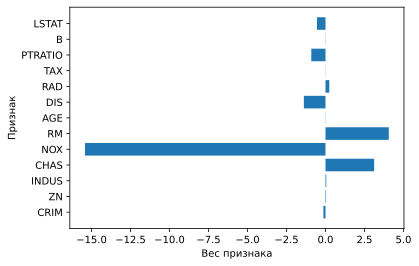

In [22]:
# Задаем размер фигуры
plt.rcParams['figure.figsize'] = 6, 4
# Задаём данные для отрисовки
plt.barh(feature_names, lr.coef_.flatten())
# Подписываем оси
plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

### Задание 2
- Создайте модель под названием `model` с помощью класса `RandomForestRegressor` из модуля `sklearn.ensemble`.
- Сделайте агрумент `n_estimators` равным 1000, `max_depth` должен быть равен 12 и `random_state` сделайте равным 42.
- Обучите модель на тренировочных данных аналогично тому, как вы обучали модель `LinearRegression`, но при этом в метод `fit` вместо датафрейма `y_train` поставьте `y_train.values[:, 0]`, чтобы получить из датафрейма одномерный массив Numpy, так как для класса `RandomForestRegressor` в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
- Сделайте предсказание на тестовых данных и посчитайте `R2`. Сравните с результатом из предыдущего задания.
- Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Создадим модель с количеством деревьев в лесу 1000, с максимальной глубиной залегания дерева 12
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [24]:
# Обучим модель
model.fit(X_train, y_train.values[:, 0])
# Выполним predict
y_pred_random_forest = model.predict(X_test)

Подсчитаем предсказания на тестовых данных и вычислим коэффициент [R2](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [25]:
from sklearn.metrics import r2_score

# Оценим предсказания по метрике R2 для модели RandomForestRegressor
r2_score(y_test, y_pred_random_forest)

0.87472606157312

In [26]:
# Оценим предсказания по метрике R2 для модели LinearRegression
r2_score(y_test, y_pred_linear)

0.7112260057484948

#### Вывод:
Модель регресии 'Случайный лес' предсказывает лучше, чем 'Линейная' модель регресии.

### *Задание 3
- Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_.
- С помощью этого атрибута найдите сумму всех показателей важности, установите, какие два признака показывают наибольшую важность.

In [27]:
?RandomForestRegressor.feature_importances_

Type:        property
String form: <property object at 0x00000267A3F6F060>
Docstring:  
The impurity-based feature importances.

The higher, the more important the feature.
The importance of a feature is computed as the (normalized)
total reduction of the criterion brought by that feature.  It is also
known as the Gini importance.

high cardinality features (many unique values). See
:func:`sklearn.inspection.permutation_importance` as an alternative.

Returns
-------
feature_importances_ : ndarray of shape (n_features,)
    The values of this array sum to 1, unless all trees are single node
    trees consisting of only the root node, in which case it will be an
    array of zeros.

In [28]:
print(f'Сумма всех показателей важности = {sum(model.feature_importances_)}')

Сумма всех показателей важности = 1.0


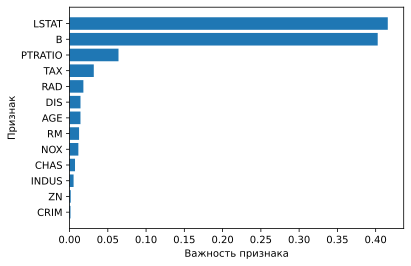

In [29]:
# Задаем размер фигуры
plt.rcParams['figure.figsize'] = 6, 4
# Задаём данные для отрисовки
plt.barh(feature_names, np.sort(model.feature_importances_))
# Подписываем оси
plt.xlabel("Важность признака")
plt.ylabel("Признак")

plt.show()

### *Задание 4
- В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке `Matplotlib`, это датасет `Credit Card Fraud Detection`.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики `accuracy` не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять `AUC`, то есть площадь под кривой `ROC`.
- Импортируйте из соответствующих модулей `RandomForestClassifier`, `GridSearchCV` и `train_test_split`.
- Загрузите датасет `creditcard.csv` и создайте датафрейм `df`.
- С помощью метода `value_counts` с аргументом `normalize=True` убедитесь в том, что выборка несбалансирована. Используя метод `info`, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
```python
pd.options.display.max_columns = 100
```
- Просмотрите первые 10 строк датафрейма df.
- Создайте датафрейм `X` из датафрейма `df`, исключив столбец `Class`.
- Создайте объект `Series` под названием `y` из столбца `Class`.
- Разбейте `X` и `y` на тренировочный и тестовый наборы данных при помощи функции `train_test_split`, используя аргументы: 
```python
test_size=0.3, random_state=100, stratify=y  
```
- У вас должны получиться объекты `X_train`, `X_test`, `y_train` и `y_test`.
- Просмотрите информацию о их форме.
- Для поиска по сетке параметров задайте такие параметры:
```python
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 
               'max_depth': np.arange(4, 7)}]
```
- Создайте модель `GridSearchCV` со следующими аргументами:
```python
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters, scoring='roc_auc', cv=3
```
- Обучите модель на тренировочном наборе данных (может занять несколько минут).
- Просмотрите параметры лучшей модели с помощью атрибута `best_params_`.
- Предскажите вероятности классов с помощью полученной модели и метода `predict_proba`.
- Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив `y_pred_proba`. Из модуля `sklearn.metrics` импортируйте метрику `roc_auc_score`.
- Вычислите `AUC` на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы `y_test` и `y_pred_proba`.

In [30]:
# Импортируем модули
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

Если нет датасета `Credit Card Fraud Detection` (creditcard.csv), то скачаем его с сайта Kaggle.com по ссылке: 

[Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [31]:
# Читаем csv файл
df = pd.read_csv('./creditcard.csv', engine='python', on_bad_lines='skip')
# Зададим максимальное число отображаемых столбцов
pd.options.display.max_columns = 100
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
df.info()

[8 примеров использования value_counts из Pandas](https://pythonru.com/primery/pandas-value-counts)

In [ ]:
# Посмотрим на сколько сбалонсирована выборка
for col in df.columns:
    print(df[col].value_counts(normalize=True))

#### Выборка не сбалансирована, число операцй совершенных жуликами гораздо меньше

In [34]:
# Создадим датафрем Х без столбца 'Class'
X = pd.DataFrame(df.drop(['Class'], axis=1))
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [35]:
# Создадим объект Series
y = pd.Series(df['Class'])
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

[Примеры разделения датасета на train и test c Scikit-learn](https://pythonru.com/baza-znanij/sklearn-train-test-split)

In [63]:
# Разделим данные на тестовые и тренировочные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [199020    344]
Количество строк в y_test по классам: [85295   148]


In [65]:
# Посмотрим соотношение таргета в тренировочных и тестовых данных (1 и 0 должно быть поровну)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Class
0    0.998275
1    0.001725
Name: proportion, dtype: float64
Class
0    0.998268
1    0.001732
Name: proportion, dtype: float64


Посмотрим информацию о полученных данных

In [ ]:
X_train.info()

In [ ]:
y_train.info()

In [ ]:
X_test.info()

In [ ]:
y_test.info()

In [95]:
# Параметры для перебора
# n_estimators – число деревьев в лесу,
# max_depth – глубина дерева,
# max_features - максимальное количество признаков, которое модели случайного леса разрешается опробовать при каждом разбиении
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]

# Создаём модель кросс валидация = 3, метрика = 'roc_auc'
cl = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3)

In [96]:
# Обучим модель на тренировочных данных
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='accuracy')

Для ознакомления с результатами Grid search можно использовать атрибут `.cv_results_`. Удобнее всего визуализировать эти результаты в виде `DataFrame`:

In [97]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

Посмотрим, как выбранные нами параметры влияют на точность модели:

In [99]:
param_columns = [
    column
    for column in cv_results.columns
    if column.startswith('param_')
]

score_columns = ['mean_test_score']

cv_results = (cv_results[param_columns + score_columns]
              .sort_values(by=score_columns, ascending=False))

cv_results.head(10)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score
10,6,4,10,0.999443
11,6,4,15,0.999428
7,5,4,15,0.999363
6,5,4,10,0.999343
9,6,3,15,0.999328
8,6,3,10,0.999313
4,5,3,10,0.999283
5,5,3,15,0.999278
3,4,4,15,0.999238
2,4,4,10,0.999233


Мы видим, что наилучшей точности модель достигает, если взять 10 деревьев глубины не более 6, и на каждом из них выбирать не более 4 признаков. 

Наилучшие параметры можно также посмотреть, используя атрибут `.best_params_`.

In [100]:
clf.best_params_

{'max_depth': np.int64(6), 'max_features': np.int64(4), 'n_estimators': 10}

Полученная в результате модель аналогична такой модели:

In [103]:
clf = RandomForestClassifier(max_depth=6, max_features=4, n_estimators=10)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Для подсчёта правильных ответов будем использовать метрику accuracy (точность). Она равна отношению числа объектов, на которых целевой класс был угадан верно, к общему числу объектов.

In [104]:
# зададим точку отсчета
np.random.seed(245)

# создадим массив 3х4 (12 значений) нормально распределенной величины с матожиданием 0 и СКО 1
b = np.random.normal(0, 1, 12).reshape(3, -1)
b

array([[-0.23276742,  0.81853041, -0.97334932, -0.09361855],
       [ 1.22394124, -0.83015668,  0.70625833,  0.14231432],
       [ 0.07152523, -0.54676696,  1.43105111, -2.14285385]])

In [ ]:
print(f'Среднее значение: {b.mean()}, Среднеквадратичное отклонение: {b.std()}')

In [ ]:
b2 = b.reshape(-1)
b2

In [ ]:
b.size == b2.size

In [ ]:
# Посмотрим на распределение
plt.hist(b2, density=True, bins=20, alpha=0.5)
# Название графика
plt.title("Распределение", fontdict=title_font)
# Подпишем ось y
plt.ylabel("Плотность распределения", fontdict=label_font)

plt.show()

In [ ]:
a = np.arange(20, 0, -2)
a

In [ ]:
b = np.arange(20, 1, -2).reshape(1, 10)
b

In [ ]:
a.shape

In [ ]:
b.shape

In [ ]:
a = np.zeros((3, 2))
a

In [ ]:
b = np.ones((2, 2))
b

In [ ]:
# Способ 1
v = np.vstack((a, b))
v

In [ ]:
v.size

In [ ]:
# Способ 2
v = np.concatenate((a, b), axis=0)
v

In [ ]:
v.size

In [ ]:
a = np.arange(1, 13)
a

In [ ]:
A = a.reshape(4, 3)
A

In [ ]:
At = A.T
At

In [ ]:
B =  A.dot(At)
B

In [ ]:
B.shape

In [ ]:
def calc_param_matrix(matrix):
    '''
    Функция вычисляет определитель матрицы и обратную матрицу.
    
    :param matrix: Исследуемая матрица,
    :return: вердикт в txt, обратная матрица.
    '''
    result_out = 'Определитель матрицы равен 0, обратную матрицу вычислить нельзя'
    matrix_1 = 0
    
    # Вычисляем определитель матрицы
    D = np.round(np.linalg.det(matrix), decimals=2)
    
    # Проверяем, чему равен определитель матрицы, если нулю, то  обратную матрицу вычислить нельзя
    if D:
        result_out = f'Определитель матрицы равен: {D}\n'
        # Вычислим ранг матрицы
        rang = np.linalg.matrix_rank(matrix)
        result_out += f'Ранг матрицы равен: {rang}\n'
        # Вычисляем обратную матрицу
        matrix_1 = np.linalg.inv(matrix)
        result_out += 'Обратная матрица\n'
        result_out += np.array2string(matrix_1)
        # Проверяем перемножаем матрицу и обратную матрицу, получим единичную матрицу
        result_out += '\nПроверка (матрица * обратная матрица)\n'
        result_out += np.array2string(np.round(matrix_1.dot(matrix), decimals=2))
    
    return result_out, matrix_1


In [ ]:
# print(calc_param_matrix([[1.,2], [3, 4]])[0])    # тест
print(calc_param_matrix(B)[0])

In [ ]:
# Инициализируем генератор случайных чисел
np.random.seed(42)

In [ ]:
# Случайные равномерно распределённые числа
a = np.random.uniform(0, 15, 16).astype(int)
a

In [ ]:
# Посмотрим на распределение
plt.hist(a, density=True, bins=20, alpha=0.5)
# Название графика
plt.title("Распределение", fontdict=title_font)
# Подпишем ось y
plt.ylabel("Плотность распределения", fontdict=label_font)

plt.show()

In [ ]:
C = a.reshape(4, -1)
C

In [ ]:
B

In [ ]:
D = B + C * 10
D

In [ ]:
log_matrix, D_inv = calc_param_matrix(D)
print(log_matrix)

In [ ]:
# Посмотрим, что записалось
D_inv

In [105]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9993445923013002

In [113]:
y_pred_proba = clf.predict_proba(X_test)[:, 0]
y_pred_proba = y_pred_proba.sort()
y_pred_proba

In [114]:
y_pred_proba